# 数据理解

包括数据的统计描述、分布、可视化技术

## 获取数据

In [1]:
import numpy as np
incomes = np.random.normal(27000, 15000, 10000)

## 描述数据

In [2]:
np.mean(incomes) # 均值

27032.99300913654

In [3]:
np.median(incomes) # 中位数

26800.71023931972

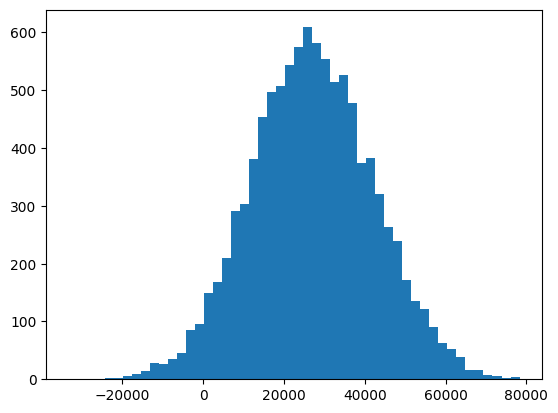

In [4]:
import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

### 离群点分析

In [5]:
outlier_incomes = np.append(incomes, [1000000000])

In [6]:
(np.mean(outlier_incomes), np.median(outlier_incomes)) # 均值明显受到离群点的影响，中位数则几乎不受影响

(127020.29098003855, 26801.334794353854)

### 计算众数

In [7]:
ages = np.random.randint(18, high=90, size=500)

In [8]:
ages

array([68, 86, 53, 23, 21, 79, 32, 60, 32, 57, 88, 24, 63, 19, 30, 53, 64,
       85, 20, 82, 43, 27, 34, 27, 62, 24, 42, 84, 49, 53, 49, 34, 40, 30,
       65, 37, 85, 37, 46, 44, 23, 44, 79, 33, 75, 18, 18, 26, 19, 31, 44,
       80, 71, 76, 83, 72, 67, 59, 63, 28, 22, 71, 55, 72, 73, 33, 34, 77,
       24, 75, 44, 83, 39, 39, 63, 36, 77, 22, 88, 45, 71, 61, 72, 24, 76,
       60, 70, 66, 81, 28, 36, 71, 60, 60, 54, 59, 64, 29, 39, 63, 78, 51,
       48, 19, 46, 87, 47, 52, 80, 51, 58, 60, 28, 27, 82, 54, 35, 75, 45,
       38, 29, 25, 85, 27, 21, 43, 68, 63, 30, 51, 25, 46, 66, 41, 80, 39,
       76, 73, 63, 83, 82, 54, 37, 53, 18, 86, 20, 66, 38, 37, 28, 39, 30,
       83, 48, 69, 88, 66, 83, 81, 86, 65, 54, 27, 57, 85, 18, 66, 18, 51,
       72, 30, 48, 74, 51, 23, 42, 35, 20, 80, 85, 70, 46, 70, 36, 52, 39,
       38, 70, 34, 52, 71, 35, 89, 50, 21, 44, 44, 56, 45, 37, 29, 69, 70,
       88, 40, 44, 87, 57, 25, 87, 73, 88, 65, 34, 88, 45, 86, 37, 72, 20,
       46, 25, 79, 38, 27

In [9]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=57, count=15)

### 计算标准差和方差

In [10]:
incomes.std() # 计算标准差

15111.340389415718

In [11]:
incomes.var() # 计算方差

228352608.36478677

### 概率密度函数和概率质量函数

#### 均匀分布

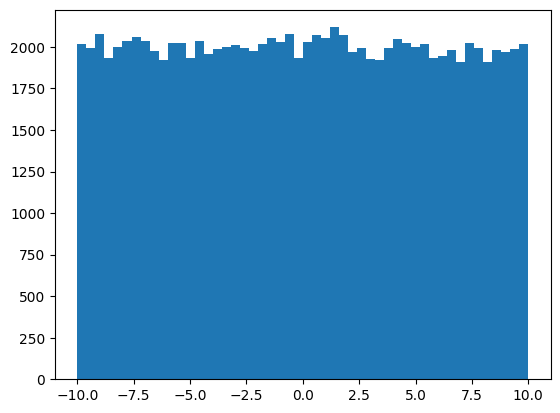

In [12]:
import numpy as np
import matplotlib.pyplot as plt

values = np.random.uniform(-10.0, 10.0, 100000)  # 构建均匀分布的随机数
plt.hist(values, 50)
plt.show()

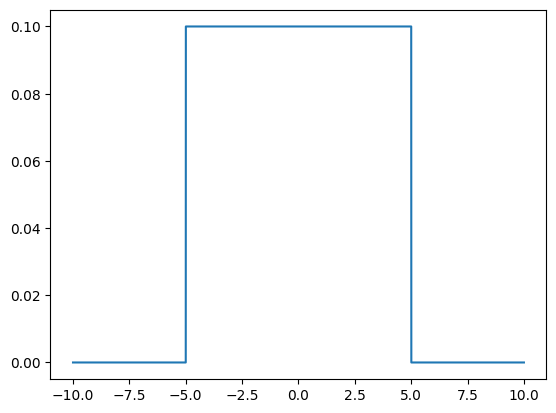

In [13]:
from scipy.stats import uniform
x = np.arange(-10, 10, 0.001)
plt.plot(x, uniform.pdf(x, loc=-5, scale=10))
# plt.savefig('./fig/uniform_pdf.png', format='png')

#### 正态分布或高斯分布

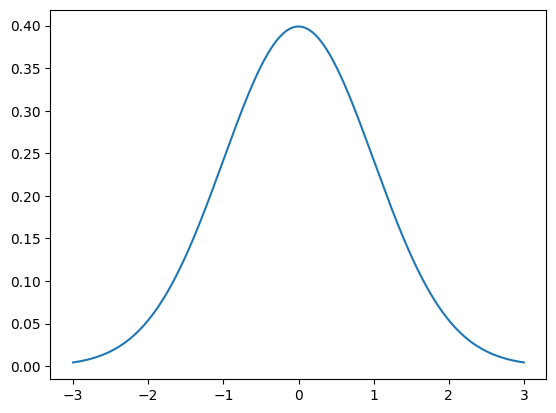

In [14]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # pdf: probability density function - 概率密度函数
# plt.savefig('./fig/norm_pdf.png', format='png')

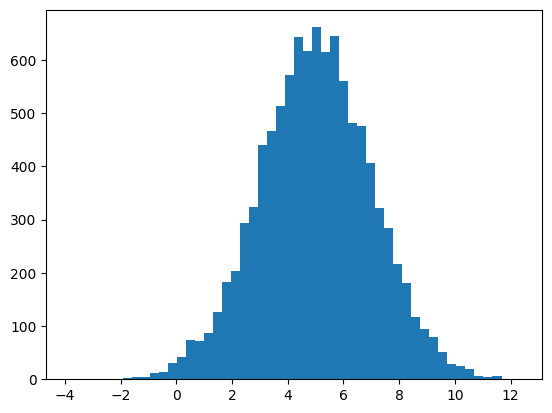

In [15]:
# 构建正态分布随机数，使用直方图描述数据分布情况

import numpy as np
import matplotlib.pyplot as plt

mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

#### 指数概率分布

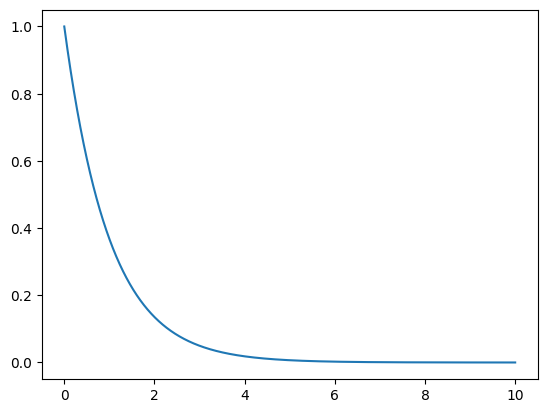

In [16]:
from scipy.stats import expon
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))
# plt.savefig('./fig/expon_pdf.png', format='png')

#### 二项式概率质量函数

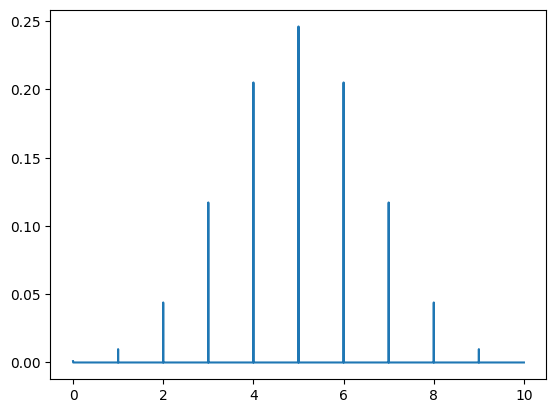

In [17]:
from scipy.stats import binom
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
plt.plot(x, binom.pmf(x, n=10, p=0.5))
# plt.savefig('./fig/binom_pmf.png', format='png')

#### 泊松概率质量函数

如果你知道了在给定时间段内某个事情发生的平均次数，那么就可以使用泊松概率质量函数来预测未来某个时段这个事情发生另一个次数的概率。

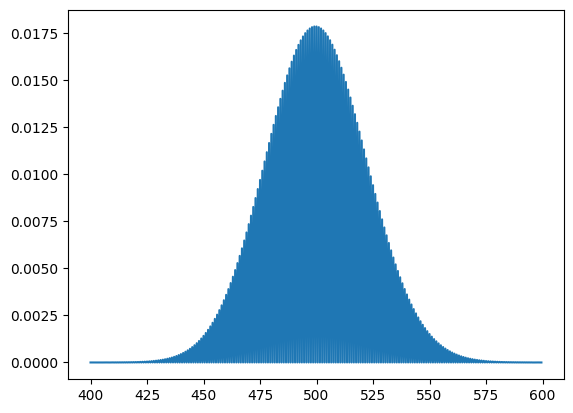

In [18]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
# plt.savefig('./fig/poisson_pmf.png', format='png')

### 计算百分位数

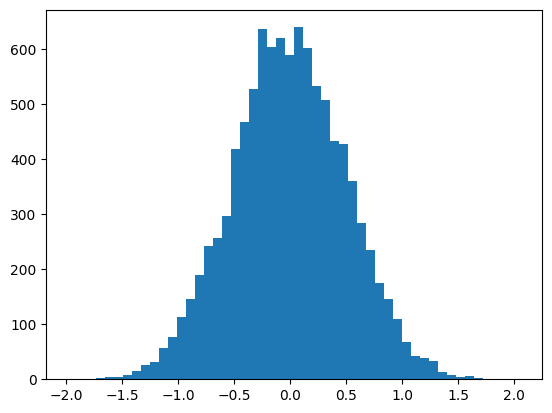

In [19]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)
plt.hist(vals, 50)
plt.show()

In [20]:
np.percentile(vals, 50) # 计算第50个百分位 -- 即 中位数

-0.006633524528997761

### 计算矩

- 一阶矩：均值
- 二阶矩：方差
- 三阶矩：偏度
- 四阶矩：峰度

关于偏度：

负偏长尾在左侧；正偏长尾在右侧

三阶矩、四阶矩是形状参数，跟分布的位置无关（比如正态分布的均值，就代表位置），跟标准差也无关。

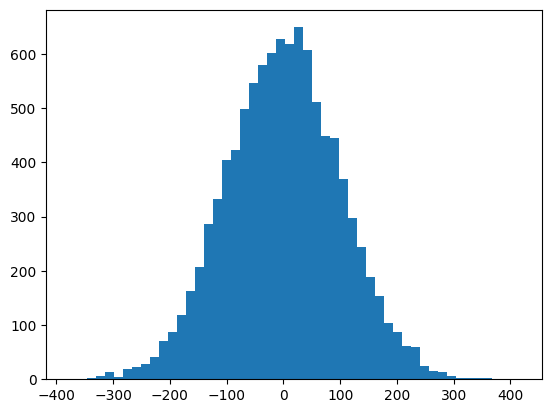

In [21]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 100, 10000)

plt.hist(vals, 50)
plt.show()

In [22]:
np.mean(vals) # 一阶矩：均值

0.3753283204871278

In [23]:
np.var(vals) # 二阶矩：方差

10027.776739191906

In [24]:
import scipy.stats as sp
sp.skew(vals) # 三阶矩：偏度

-0.0006620839510015973

In [25]:
sp.kurtosis(vals) # 四阶矩：峰度

0.011222296158943657

### 可视化技术

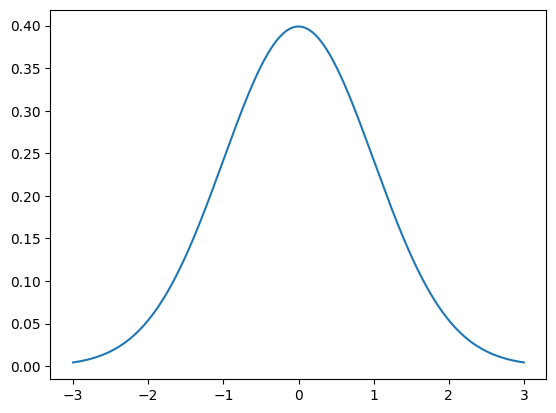

In [26]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x))
plt.show()

#### 一张图形上多次绘图

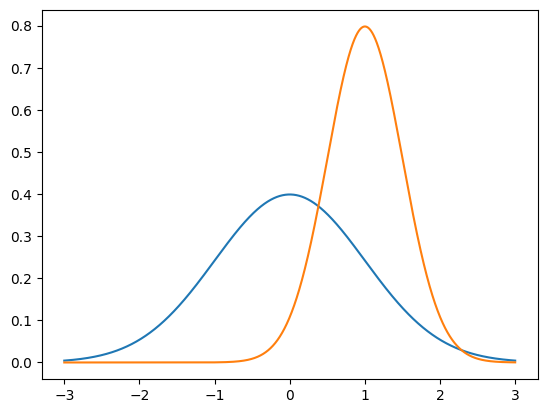

In [27]:
# 在一张图形上多次绘图

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

#### 将图形保存为文件

In [28]:
!chdir

d:\Projects\ml-notes\examples\data_analysis


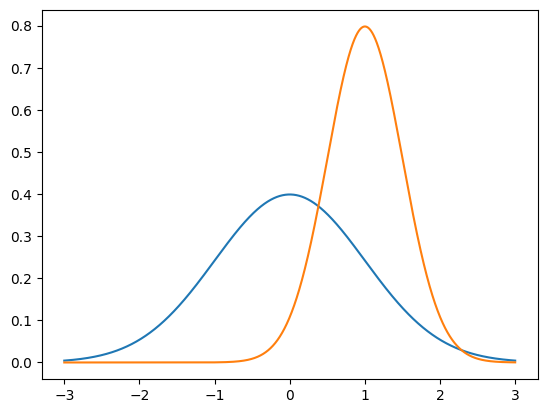

In [29]:
# 将图形保存为文件

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
# plt.savefig('./MyPlot.png', format='png')

#### 调整坐标轴

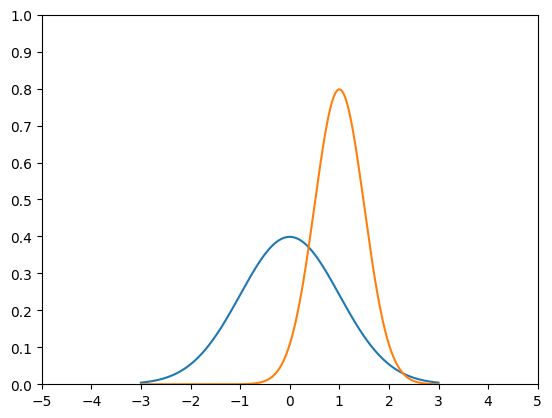

In [30]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6).tolist()) # numpy.ndarray to list
axes.set_yticks(np.arange(0, 1.1, 0.1).tolist())

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

#### 添加网格

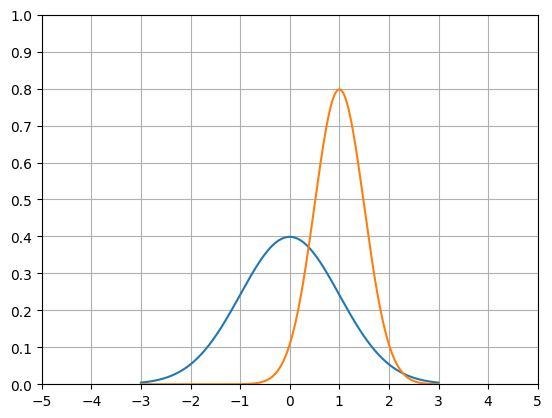

In [31]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6).tolist())
axes.set_yticks(np.arange(0, 1.1, 0.1).tolist())
axes.grid() # 添加网格

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

#### 修改线型和颜色

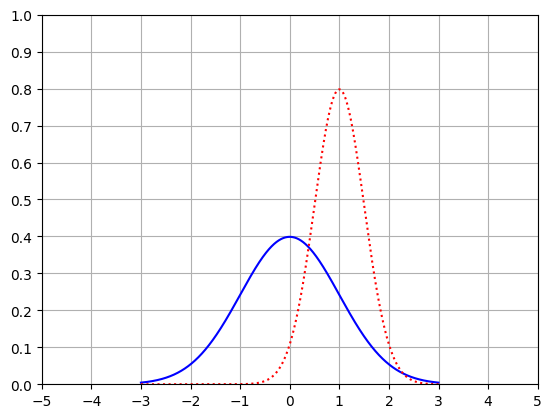

In [32]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6).tolist())
axes.set_yticks(np.arange(0, 1.1, 0.1).tolist())
axes.grid() # 添加网格

plt.plot(x, norm.pdf(x), 'b-')
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:')
plt.show()

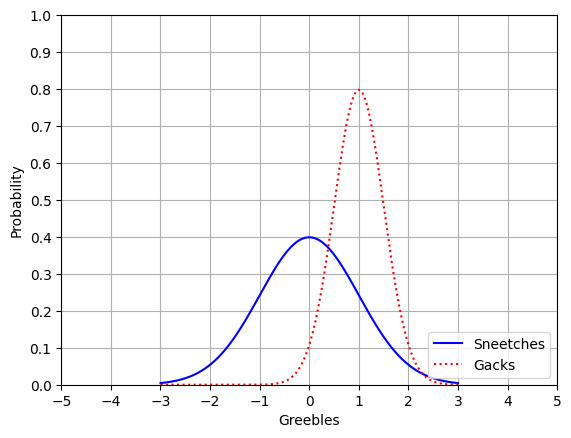

In [33]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6))
axes.set_yticks(np.arange(0, 1.1, 0.1))
axes.grid() # 添加网格
plt.xlabel('Greebles') # 标记坐标轴
plt.ylabel('Probability')
plt.plot(x, norm.pdf(x), 'b-')
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:')
plt.legend(['Sneetches', 'Gacks'], loc=4) # 添加图例
plt.show()

### 饼图

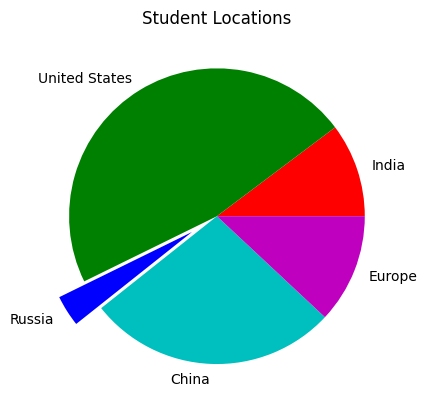

In [34]:
values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0, 0.2, 0, 0]
labels = ['India', 'United States', 'Russia', 'China', 'Europe']
plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title('Student Locations')
# plt.savefig('./fig/pie.png', format='png')
plt.show()

### 条形图

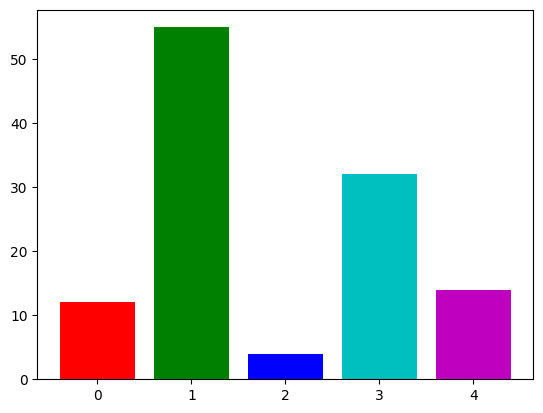

In [35]:
values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(range(0, 5), values, color=colors)
# plt.savefig('./fig/bar.png', format='png')
plt.show()

### 散点图

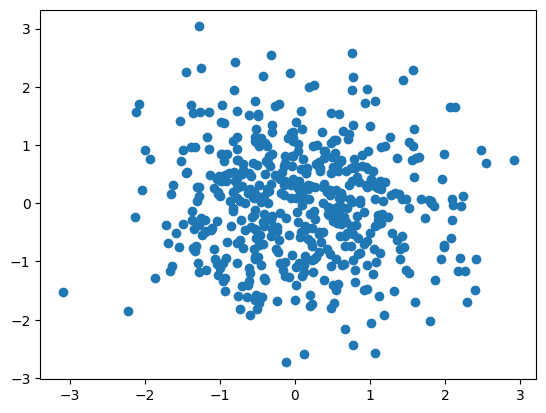

In [36]:
from pylab import randn

X = randn(500)
Y = randn(500)
plt.scatter(X, Y)
# plt.savefig('./fig/scatter.png', format='png')
plt.show()

### 直方图

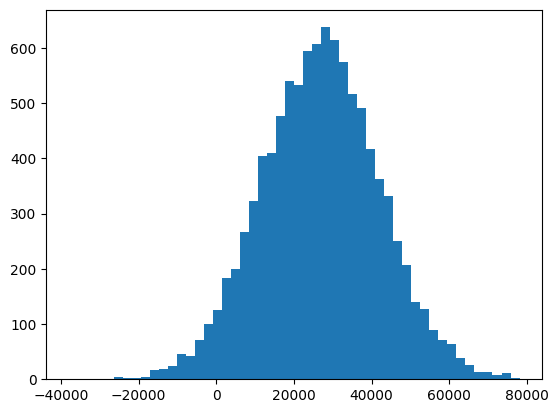

In [37]:
incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, 50)
# plt.savefig('./fig/hist.png', format='png')
plt.show()

### 箱线图

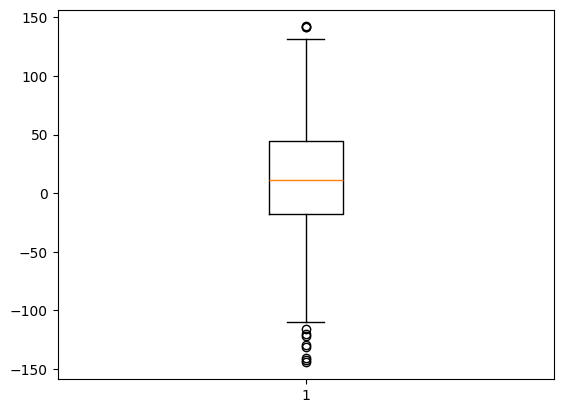

In [38]:
uniformSkewed = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100
data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data)
# plt.savefig('./fig/boxplot.png', format='png')
plt.show()

### 协方差和相关系数

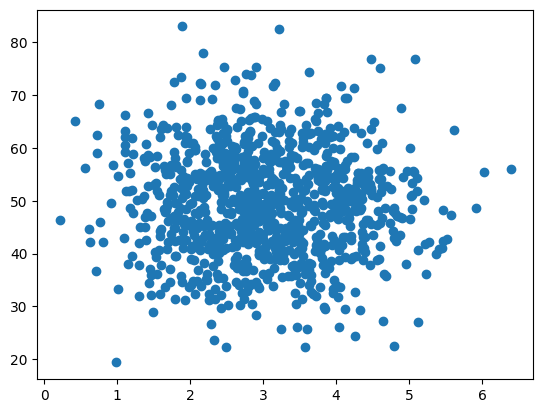

In [39]:
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

In [40]:
np.cov(pageSpeeds, purchaseAmount) # 计算协方差

array([[ 0.99948558, -0.21424205],
       [-0.21424205, 99.53564399]])

In [41]:
np.corrcoef(pageSpeeds, purchaseAmount) # 计算相关系数

array([[ 1.        , -0.02147965],
       [-0.02147965,  1.        ]])

array([[ 1.        , -0.68015053],
       [-0.68015053,  1.        ]])

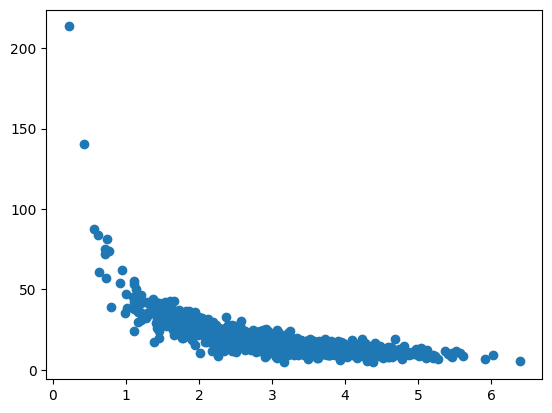

In [42]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)
np.corrcoef(pageSpeeds, purchaseAmount) # 计算相关系数

array([[ 1., -1.],
       [-1.,  1.]])

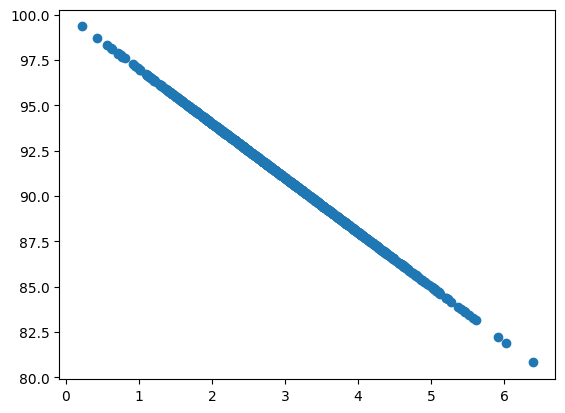

In [43]:
purchaseAmount = 100 - pageSpeeds * 3
scatter(pageSpeeds, purchaseAmount)
np.corrcoef(pageSpeeds, purchaseAmount) # 计算相关系数

In [44]:
np.cov(pageSpeeds, purchaseAmount) # 计算协方差

array([[ 0.99948558, -2.99845675],
       [-2.99845675,  8.99537025]])